In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]
inpatient_cardi = inpatient[inpatient['Cardiovascular'] == 1].drop(columns = ['Cardiovascular','First listed discharge diagnosis icd10 subcategory','Second listed discharge diagnosis icd10 subcategory'])
inpatient_cardi.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Readmission
5,100020,54.555173,2016-03-27 21:58:50.0,2016-03-27 23:41:21.0,NON-COUNT,NON-COUNT,PSYCH RESID REHAB TRMT PROG,ED OBSERVATION,Regular,0,1,NaN,0.0,Pennsylvania,1
6,100029,87.512004,2012-10-02 15:17:51.0,2012-10-09 10:35:23.0,SURGERY,MEDICINE,GASTROENTEROLOGY,TELEMETRY,Regular,0,1,NaN,0.0,Florida,1
7,10003,54.703168,2002-04-25 00:11:38.0,2002-06-11 01:08:19.0,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE),Regular,0,1,NaN,NaN,Texas,1
8,10003,55.271575,2002-11-18 18:15:13.0,2002-11-26 21:17:51.0,SURGERY,SURGERY,NH SHORT STAY REHABILITATION,PERIPHERAL VASCULAR,Regular,0,1,NaN,NaN,Texas,1
9,10003,60.837758,2008-06-14 04:48:50.0,2008-06-25 18:44:59.0,MEDICINE,MEDICINE,"STAR I, II & III",Not specified (no value),Regular,0,1,NaN,1.0,Texas,1


In [3]:
path = '/home/bhatti/dataset/VCHAMPS/medications_ordered_train.csv'
medications_ordered = pd.read_csv(path).iloc[:,1:]
medications_ordered.head()

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
0,1,59.763581,2004-01-09 14:07:46.0,2004-01-09 01:33:46.0,2004-04-02 11:27:46.0,2004-04-02 11:27:46.0,lisinopril,discontinued/edit,Not specified (no value),Indiana
1,1,59.998896,2004-04-04 14:19:12.0,2004-04-04 04:26:12.0,2005-03-07 04:26:12.0,2005-04-17 15:19:12.0,Not specified,discontinued,Not specified (no value),Indiana
2,1,60.794427,2005-01-20 08:43:00.0,2005-01-19 20:06:00.0,2005-06-29 05:18:00.0,2005-06-29 05:18:00.0,lisinopril,discontinued,Requesting Physician Cancelled,Indiana
3,1,61.136678,2005-05-25 10:56:29.0,2005-05-24 20:23:29.0,2005-06-23 20:23:29.0,NaN,amoxicillin,expired,Not specified (no value),Indiana
4,1,63.256011,2007-07-09 01:43:28.0,2007-07-08 20:21:28.0,2007-08-07 20:21:28.0,NaN,Not specified,expired,Not specified (no value),Indiana


In [6]:
pid = set.intersection(set(inpatient_cardi['Internalpatientid'].unique()),
                       set(medications_ordered['Internalpatientid'].unique()))

inpatient = inpatient_cardi[inpatient_cardi['Internalpatientid'].isin(pid)].reset_index(drop = True)
medications = medications_ordered[medications_ordered['Internalpatientid'].isin(pid)].reset_index(drop = True)

In [8]:
#medications.to_csv('/home/daisy/FDA_Dataset/medications_ordered_cardi.csv')

In [4]:
path = '/home/daisy/FDA_Dataset/medications_ordered_cardi.csv'
medications = pd.read_csv(path).iloc[:,1:]
medications.head()

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
0,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:06:15.0,2002-12-01 15:06:15.0,glyceryl trinitrate,discontinued,Not specified (no value),Florida
1,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:06:15.0,2002-12-01 15:06:15.0,lidocaine,discontinued,Not specified (no value),Florida
2,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:05:15.0,2002-12-01 15:05:15.0,dopamine,discontinued,Not specified (no value),Florida
3,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:04:15.0,2002-12-01 15:04:15.0,dobutamine,discontinued,Not specified (no value),Florida
4,1000,83.374655,2002-11-27 10:28:12.0,2002-11-27 08:04:12.0,2002-11-28 13:30:12.0,2002-11-28 13:30:12.0,enoxaparin,discontinued,Not specified (no value),Florida


From Ordered medication atc 5.unique(), extract medicines that may highly related to cardiovascular

In [5]:
cardi_med = ['glyceryl trinitrate', 'lidocaine', 'dopamine', 'dobutamine',
             'enoxaparin', 'digoxin','spironolactone','amlodipine',
             'clopidogrel', 'atorvastatin', 'metoprolol','lisinopril',
             'warfarin', 'carvedilol']

In [6]:
# if the patient use a cardiovascular relate medicine, count = 1
medications['medication_cnt'] = medications['Ordered medication atc 5'].apply(lambda x: 1 if x in cardi_med else 0)

# total number of cardiovascular relate medicine a patient takes
medications['num_medication'] = medications['medication_cnt'].groupby(medications['Internalpatientid']).transform('sum')

In [77]:
medications['num_medication'].isna().sum()

0

In [10]:
medications.describe()

,Internalpatientid,Age at med ordered,medication_cnt,num_medication
count,3.487233e+07,3.487233e+07,3.487233e+07,3.487233e+07
mean,8.491695e+04,6.919254e+01,1.273299e-01,1.404772e+02
std,4.896591e+04,1.097195e+01,3.333422e-01,1.191545e+02
min,2.000000e+00,1.449983e+01,0.000000e+00,0.000000e+00
25%,4.212600e+04,6.152536e+01,0.000000e+00,6.500000e+01
50%,8.554000e+04,6.893778e+01,0.000000e+00,1.100000e+02
75%,1.273530e+05,7.695874e+01,0.000000e+00,1.800000e+02
max,1.690600e+05,1.092261e+02,1.000000e+00,1.685000e+03


<Axes: xlabel='num_medication'>

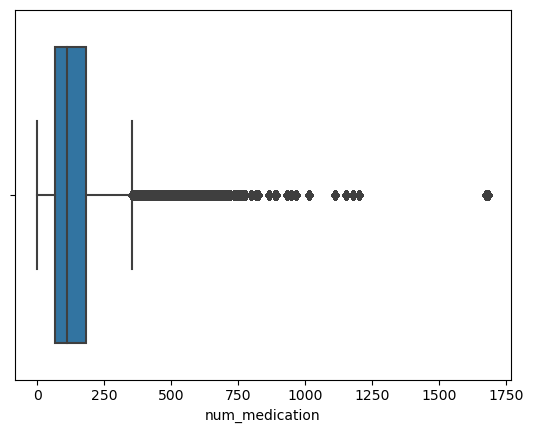

In [14]:
sns.boxplot(x = 'num_medication', data = medications)

In [19]:
len(medications[medications['num_medication'] <= 400]) / medications.shape[0]

0.9648643218028643

In [7]:
medications_subset = medications[medications['num_medication'] <= 400]

# Add targets to medications from inpatietn table
inpatient_subset = inpatient_cardi[['Internalpatientid','Died during admission', 'Readmission']]
inpatient_subset = inpatient_subset.merge(medications_subset, how = 'left', on = 'Internalpatientid')